<a href="https://colab.research.google.com/github/hmdaalln/Group7/blob/main/assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

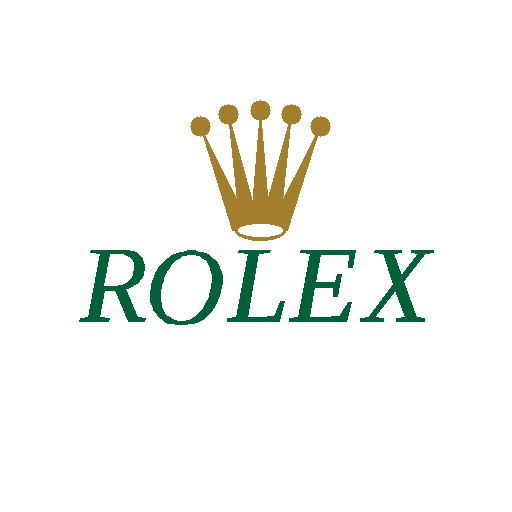

In [1]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

# Helper functions to move and scale shapes
def move_points(points, dx, dy):
    return points + [dx, dy]

def scale_points(points, factor, center=(0, 0)):
    center = np.array(center)
    return (points - center) * factor + center

def make_template(points):
    pts = np.array(points, dtype=np.float32)
    min_x, min_y = np.min(pts, axis=0)
    return pts - [min_x, min_y]

def make_hole_template(outer_pts, inner_pts):
    outer = np.array(outer_pts, dtype=np.float32)
    inner = np.array(inner_pts, dtype=np.float32)
    min_x, min_y = np.min(outer, axis=0)
    return outer - [min_x, min_y], inner - [min_x, min_y]

# Set up the canvas with a white background
img = np.zeros((512, 512, 3), np.uint8)
img[:] = (255, 255, 255) # using slicing ([:]) to select the whole image and replace all pixel values (initially black) with 255 (white)

green = (57, 96, 0)
gold = (44, 126, 163)

# Drawing the crown
center_x, center_y = 260, 230
outer_radius, inner_radius = 120, 35
spike_width = 20
angles = [60, 75, 90, 105, 120]
for angle in angles:
    rad = math.radians(angle)
    tip_x = int(center_x - outer_radius * math.cos(rad))
    tip_y = int(center_y - outer_radius * math.sin(rad))
    cv2.circle(img, (tip_x, tip_y), 10, gold, -1)
    base_x = int(center_x - inner_radius * math.cos(rad))
    spike = np.array([(tip_x, tip_y),
                      (base_x - spike_width // 2, center_y),
                      (base_x + spike_width // 2, center_y)], np.int32)
    cv2.fillPoly(img, [spike], gold)
cv2.ellipse(img, (center_x, center_y), (25, 10), 0, 0, 360, gold, -1)
cv2.ellipse(img, (center_x, center_y), (22, 6), 0, 0, 360, (255, 255, 255), -1)

# Points for the letters (R, O, L, E, X)
#R
r_outer = [[352, 340], [347, 367], [357, 368], [356, 371], [327, 371], [328, 368], [336, 367], [348, 303], [338, 302], [339, 300], [368, 300], [371, 300], [376, 300], [379, 301], [381, 301], [385, 303], [386, 304], [387, 305], [390, 308], [390, 309], [391, 311], [392, 315], [392, 317], [392, 319], [391, 323], [391, 325], [390, 327], [388, 329], [387, 331], [386, 332], [382, 334], [381, 335], [379, 336], [375, 338], [373, 338], [385, 367], [393, 368], [392, 371], [376, 371], [363, 340], [352, 340]]
r_inner = [[361, 335], [363, 335], [368, 334], [369, 334], [371, 333], [374, 332], [376, 330], [377, 329], [379, 327], [380, 325], [380, 323], [381, 319], [381, 317], [381, 316], [381, 313], [380, 310], [378, 308], [377, 307], [376, 307], [374, 306], [371, 304], [368, 304], [366, 304], [358, 304], [352, 335], [361, 335]]

#O
o_outer = [[363, 372], [360, 372], [355, 371], [353, 371], [351, 371], [348, 370], [345, 367], [343, 366], [342, 365], [341, 364], [339, 361], [337, 359], [336, 357], [336, 355], [335, 354], [334, 351], [333, 349], [333, 345], [333, 344], [333, 341], [334, 335], [334, 332], [335, 329], [337, 324], [338, 321], [339, 319], [342, 314], [344, 312], [346, 310], [350, 306], [352, 305], [354, 303], [360, 301], [363, 300], [365, 300], [371, 298], [375, 298], [377, 298], [382, 300], [385, 300], [387, 301], [388, 301], [391, 302], [393, 304], [395, 306], [396, 307], [397, 307], [399, 309], [401, 312], [402, 314], [402, 316], [403, 317], [404, 320], [405, 323], [405, 325], [405, 327], [405, 330], [404, 335], [403, 338], [403, 340], [401, 346], [400, 348], [399, 351], [396, 356], [395, 358], [393, 360], [389, 364], [387, 366], [385, 367], [379, 370], [376, 371], [374, 371], [367, 372], [363, 372]]
o_inner = [[394, 327], [394, 324], [393, 319], [392, 317], [392, 315], [390, 311], [389, 309], [387, 308], [384, 306], [382, 304], [380, 304], [376, 303], [374, 303], [371, 303], [367, 304], [365, 304], [363, 306], [359, 308], [357, 310], [355, 312], [353, 316], [352, 317], [350, 319], [348, 324], [347, 326], [347, 329], [345, 333], [345, 335], [344, 338], [344, 343], [344, 344], [344, 347], [345, 352], [345, 354], [346, 356], [348, 360], [349, 362], [350, 363], [354, 365], [355, 366], [358, 367], [361, 368], [364, 368], [366, 368], [371, 367], [373, 366], [375, 365], [379, 362], [380, 361], [382, 359], [385, 356], [386, 354], [387, 351], [390, 347], [391, 345], [391, 343], [392, 338], [393, 335], [393, 333], [394, 329], [394, 327]]

#I
l_points = [[369, 302], [358, 303], [347, 367], [358, 367], [364, 367], [369, 366], [372, 366], [374, 366], [380, 351], [384, 351], [379, 371], [327, 371], [327, 368], [336, 367], [348, 303], [338, 302], [339, 300], [370, 300], [369, 302]]

# E
e_points = [[327, 368], [336, 367], [348, 303], [338, 302], [339, 300], [393, 300], [390, 317], [386, 317], [387, 305], [385, 304], [383, 304], [380, 304], [378, 304], [375, 304], [373, 304], [371, 304], [370, 304], [358, 304], [353, 332], [373, 332], [375, 324], [379, 324], [375, 346], [371, 346], [371, 337], [352, 337], [347, 367], [361, 367], [364, 367], [367, 367], [370, 366], [373, 366], [375, 366], [377, 366], [386, 352], [389, 352], [384, 371], [327, 371], [327, 368]]

#X
x_points = [[368, 331], [381, 367], [389, 368], [389, 371], [361, 371], [361, 368], [370, 367], [360, 340], [339, 367], [348, 368], [348, 371], [325, 371], [325, 368], [333, 367], [358, 334], [348, 303], [339, 302], [340, 300], [366, 300], [366, 302], [358, 303], [366, 325], [383, 303], [376, 302], [376, 300], [398, 300], [398, 302], [390, 303], [368, 331]]

# Prepare letter templates
R_OUTER, R_INNER = make_hole_template(r_outer, r_inner)
O_OUTER, O_INNER = make_hole_template(o_outer, o_inner)
L_TEMP = make_template(l_points)
E_TEMP = make_template(e_points)
X_TEMP = make_template(x_points)

# Settings for drawing the word
scale = 1.0
letter_spacing = 5
y_pos = 250

# List of letters to draw
letters = [
    (R_OUTER, R_INNER),
    (O_OUTER, O_INNER),
    (L_TEMP,),
    (E_TEMP,),
    (X_TEMP,)
]

# Center the text horizontally
total_width = sum(np.max(letter[0], axis=0)[0] * scale for letter in letters)
total_width += letter_spacing * (len(letters) - 1)
start_x = (512 - total_width) // 2

# Draw the letters
x_pos = start_x
for letter in letters:
    outer = move_points(scale_points(letter[0], scale), x_pos, y_pos)
    cv2.fillPoly(img, [outer.astype(np.int32)], green)
    if len(letter) > 1:
        inner = move_points(scale_points(letter[1], scale), x_pos, y_pos)
        cv2.fillPoly(img, [inner.astype(np.int32)], (255, 255, 255))
    x_pos += np.max(letter[0], axis=0)[0] * scale + letter_spacing

# Display the final image
cv2_imshow(img)